# 2025-1 INSIGHT 1차 교육세션 사전학습 과제
## 판다스 세션

## 판다스란? About Pandas

numpy의 확장판인, 데이터 분석 특화 *파이썬 라이브러리*

`import pandas as pd`

를 통해 라이브러리를 불러오고 (외부 라이브러리이기 때문에 pip 모듈로 다운 받아야 함)

데이터 프레임 형태를 기본으로 데이터들을 다루는 라이브러리임!!

## 데이터 프레임의 구성

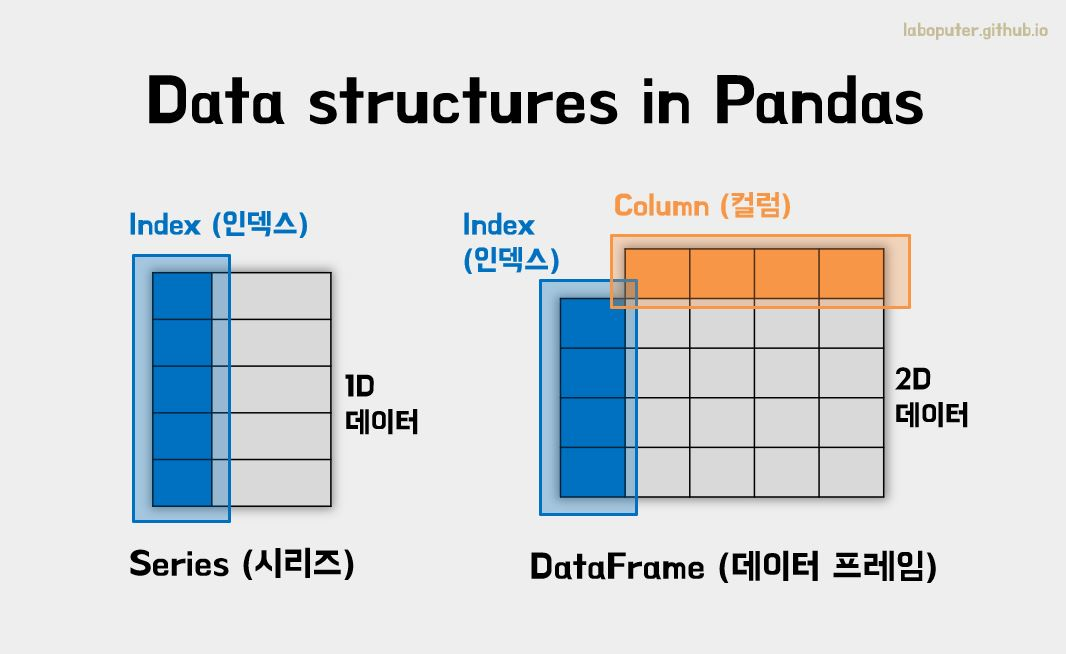

우선적으로, 판다스에서는 대표적으로 2개의 데이터 자료 구조를 사용함
> 시리즈 (Series)

시리즈는 **1차원 자료구조**로, 값 & 인덱스로 구성된 간단한 구조임 (*값들의 자료형이 통일되어야함!!*)

데이터 프레임에서 특정 열 (column) 하나만 추출하면 -> 그건 시리즈 형태

> 데이터 프레임 (DataFrame)

데이터 프레임은 2차원 자료구조이고, 행(index) & 열(column)으로 구성된 형태 (컬럼끼리는 자료형이 달라도 되지만, 시리즈(가로 단위)끼리는 자료형이 같아야 함)



> 데이터 프레임 정의하기

파이썬 딕셔너리 형태로 자료구조 선언 후, pd.DataFrame() 함수를 통해 판다스 데이터 프레임 자료형으로 변환

In [ ]:
import pandas as pd

data = {
    '학번' : ['15', '16', '17', '19', '16'],
    '전공' : ['커뮤', '경영', '경영', '경영', '경제'],
    '이름' : ['민지', '다니엘', '하니', '해린', '혜인'],
	'점수' : [99, 50, 83, 91, 85],
}

df = pd.DataFrame(data)

,학번,전공,이름,점수
0,15,커뮤,민지,99
1,16,경영,다니엘,50
2,17,경영,하니,83
3,19,경영,해린,91
4,16,경제,혜인,85


## 데이터 추출

우리가 실제 다루는 데이터의 양은 매우 방대하기 때문에, 데이터 분석을 할 때마다 전체 데이터를 로드하고 처리하게 된다면, 시간 소요가 많이 되기 때문에!!

**일부를 추출하고 분석을 해야함**

1. 인덱싱(특정 데이터를 지목하기)/슬라이싱(특정 범위를 지정하기)

In [ ]:
# 인덱싱 예시
print(df['전공'][2], df['이름'][2])

# 슬라이싱 예시
print(df['이름'][:3])

경영 하니
0     민지
1    다니엘
2     하니
Name: 이름, dtype: object


2. loc & iloc로 데이터 추출하기

- loc는 label을 통해 데이터에 접근함

    [행 라벨, 열 라벨]

- iloc는 index값을 통해 데이터에 접근함

    [행,열]

In [21]:
# 행 라벨 index 0을 통해 해당 행 추출
print(df.loc[0])
print()

# 열 라벨 '점수'를 통해 해당 열 추출
print(df.loc[:,'점수'])
print()

# 2번째 행에 추출 (인덱스 값 1 활용)
print(df.iloc[1])
print()

# 3번째 열에 추출 (인덱스 값 :,2 활용)
print(df.iloc[:,2])

학번    15
전공    커뮤
이름    민지
점수    99
Name: 0, dtype: object

0    99
1    50
2    83
3    91
4    85
Name: 점수, dtype: int64

학번     16
전공     경영
이름    다니엘
점수     50
Name: 1, dtype: object

0     민지
1    다니엘
2     하니
3     해린
4     혜인
Name: 이름, dtype: object


3. 불리언 인덱싱

    조건에 따라 데이터 추출하기

In [34]:
# 전공이 '경영'인 데이터 추출하기
print(df[df['전공'] == '경영'])
print()

# 점수가 80이상인 데이터 추출하기
print(df[df['점수'] >= 80])

   학번  전공   이름  점수       학교
1  16  경영  다니엘  50    연세대학교
2  17  경영   하니  83    서강대학교
3  19  경영   해린  91  이화여자대학교

   학번  전공  이름  점수       학교
0  15  커뮤  민지  99    서강대학교
2  17  경영  하니  83    서강대학교
3  19  경영  해린  91  이화여자대학교
4  16  경제  혜인  85    서강대학교


## 데이터 조작

판다스에서는 데이터 프레임을 조회만 하는 것이 아니라, 데이터에 전체/일부를 수정 or 삭제도 할 수 있다!!

> 데이터 추가

    행 단위로 추가할 수도 있고, 열 단위로도 추가할 수 있음

In [49]:
import pandas as pd

data = {
    '학번' : ['15', '16', '17', '19', '16'],
    '전공' : ['커뮤', '경영', '경영', '경영', '경제'],
    '이름' : ['민지', '다니엘', '하니', '해린', '혜인'],
	'점수' : [99, 50, 83, 91, 85],
}

df = pd.DataFrame(data)

In [50]:
# 원본 데이터 프레임
print(df)
print()

# '학교' 컬럼 추가, 리스트 형태로 데이터 개별 지정 가능
df['학교'] = ['서강대학교','연세대학교','서강대학교','이화여자대학교','서강대학교']
print(df)
print()

# 추가할 행 단위 데이터 프레임 선언
new_data = {
    '학번': '20',
    '전공': '중문',
    '이름': '건우',
    '점수': 100,
    '학교':'서강대학교',
}
new_df = pd.DataFrame([new_data])

# 행 단위로 데이터 추가하기!! concat 활용
df = pd.concat([df, new_df], ignore_index=True)
print(df)

   학번  전공   이름  점수
0  15  커뮤   민지  99
1  16  경영  다니엘  50
2  17  경영   하니  83
3  19  경영   해린  91
4  16  경제   혜인  85

   학번  전공   이름  점수       학교
0  15  커뮤   민지  99    서강대학교
1  16  경영  다니엘  50    연세대학교
2  17  경영   하니  83    서강대학교
3  19  경영   해린  91  이화여자대학교
4  16  경제   혜인  85    서강대학교

   학번  전공   이름   점수       학교
0  15  커뮤   민지   99    서강대학교
1  16  경영  다니엘   50    연세대학교
2  17  경영   하니   83    서강대학교
3  19  경영   해린   91  이화여자대학교
4  16  경제   혜인   85    서강대학교
5  20  중문   건우  100    서강대학교


> 데이터 삭제

In [65]:
import pandas as pd

data = {
    '학번' : ['15', '16', '17', '19', '16'],
    '전공' : ['커뮤', '경영', '경영', '경영', '경제'],
    '이름' : ['민지', '다니엘', '하니', '해린', '혜인'],
	'점수' : [99, 50, 83, 91, 85],
}

df = pd.DataFrame(data)

In [66]:
# 원본데이터
print(df)
print()

# 열 단위로 삭제하기
df.drop('학번', axis=1, inplace=True)
print(df)
print()

# 행 단위로 삭제하기
print(df.drop([1]))

   학번  전공   이름  점수
0  15  커뮤   민지  99
1  16  경영  다니엘  50
2  17  경영   하니  83
3  19  경영   해린  91
4  16  경제   혜인  85

   전공   이름  점수
0  커뮤   민지  99
1  경영  다니엘  50
2  경영   하니  83
3  경영   해린  91
4  경제   혜인  85

   전공  이름  점수
0  커뮤  민지  99
2  경영  하니  83
3  경영  해린  91
4  경제  혜인  85
